# Planejamento de Rotas Inteligente com Busca A* no OpenStreetMap 🗺️


## Requisitos 
### 1.  Obtenção dos Dados do OpenStreetMap🗺️
Os alunos devem usar a biblioteca OSMNX (Python) para obter a malha viária. O 
procedimento básico envolve:
- Baixar um subgrafo de OSM para uma cidade ou bairro específico.
- Filtrar apenas os nós e arestas relevantes para a navegação. - Criar um grafo onde os vértices representam cruzamentos e as arestas representam ruas com um peso associado (distância ou tempo estimado).

### 2. Modelagem do Problema como Busca no Espaço de Estados ❓
Cada estado no espaço de busca será um nó do grafo (interseção de ruas). As transições 
entre estados ocorrem ao percorrer as ruas (arestas). Os alunos devem definir: 
- Espaço de estados: conjunto de interseções. - Operadores de transição: deslocamento de um nó para outro através de uma rua. 
- Função de custo g(n): distância percorrida ou tempo estimado. 
- Estado objetivo: o nó correspondente ao destino. - Heurísticas h(n): estimativas do custo restante até o destino.
### 3. Implementação do Algoritmo A* 👨‍💻
Os alunos devem implementar a busca A* utilizando uma fila de prioridade para explorar os 
caminhos de menor custo primeiro. A função de avaliação será: 
f(n) = g(n) + h(n) 
onde: - g(n): custo real acumulado do início até o nó atual. - h(n): heurística estimando o custo restante até o destino. 
Devem ser testadas duas heurísticas diferentes: 
1. Distância Euclidiana (considera apenas a distância em linha reta entre os nós). 
2. Distância Geodésica (Haversine) (considera a curvatura da Terra para uma melhor 
aproximação da distância).

##### importaçoes de bibilhotecas utilizadas


In [57]:
import osmnx as ox
import networkx as nx
from geopy.distance import geodesic
import heapq
import time
import matplotlib.pyplot as plt

##### Extração do grafo 

In [59]:
def obter_grafo(cidade):
    """Baixa e retorna o grafo viário da cidade escolhida."""
    return ox.graph_from_place(cidade, network_type='drive')

##### obtenção do grafo otilizado na pesquisa 

In [60]:
def obter_grafo(cidade):
    """Baixa e retorna o grafo viário da cidade escolhida."""
    return ox.graph_from_place(cidade, network_type='drive')

##### função de calculo de distancia com a heuristica euclidiana 🧠

In [61]:
def heuristica_euclidiana(nodo_atual, nodo_destino, grafo):
    """Calcula a distância euclidiana entre dois nós."""
    x1, y1 = grafo.nodes[nodo_atual]['x'], grafo.nodes[nodo_atual]['y']
    x2, y2 = grafo.nodes[nodo_destino]['x'], grafo.nodes[nodo_destino]['y']
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

##### função de calculo com a heuristica de haversine 🧠

In [62]:
def heuristica_haversine(nodo_atual, nodo_destino, grafo):
    """Calcula a distância geodésica (Haversine) entre dois nós."""
    lat1, lon1 = grafo.nodes[nodo_atual]['y'], grafo.nodes[nodo_atual]['x']
    lat2, lon2 = grafo.nodes[nodo_destino]['y'], grafo.nodes[nodo_destino]['x']
    return geodesic((lat1, lon1), (lat2, lon2)).meters

##### metodo para o calculo A* (A-STAR)

In [63]:
def a_star(grafo, origem, destino, heuristica):
    """Implementa o algoritmo A* para encontrar o caminho mais curto e coleta o número de nós explorados."""
    fila_prioridade = []
    heapq.heappush(fila_prioridade, (0, origem))
    custos = {origem: 0}
    caminhos = {origem: None}
    nos_explorados = 0  # Contador de nós explorados
    
    while fila_prioridade:
        _, nodo_atual = heapq.heappop(fila_prioridade)
        nos_explorados += 1  # Incrementa o contador a cada nó explorado
        
        if nodo_atual == destino:
            caminho = []
            while nodo_atual is not None:
                caminho.append(nodo_atual)
                nodo_atual = caminhos[nodo_atual]
            print(f"Número de nós explorados: {nos_explorados}")
            return caminho[::-1]
        
        for vizinho in grafo.neighbors(nodo_atual):
            distancia = grafo[nodo_atual][vizinho][0]['length']
            novo_custo = custos[nodo_atual] + distancia
            
            if vizinho not in custos or novo_custo < custos[vizinho]:
                custos[vizinho] = novo_custo
                prioridade = novo_custo + heuristica(vizinho, destino, grafo)
                heapq.heappush(fila_prioridade, (prioridade, vizinho))
                caminhos[vizinho] = nodo_atual
    
    if nos_explorados:  
        print(f"Número de nós explorados: {nos_explorados}")
    return None  # Sem caminho encontrado


##### função para plotar rota 

In [64]:
def plotar_rota(grafo, caminho):
    """Plota a rota encontrada no mapa."""
    fig, ax = ox.plot_graph_route(grafo, caminho, route_linewidth=3, node_size=0, bgcolor='white')
    plt.show()

### Exemplos de execução 

função para benchmark com ambas as heuristicas


### 📊 Métricas Coletadas
### Tempo de execução ⏱️
### Número de nós explorados 🔍

função para fazer o benchmark 📊

In [65]:
def a_star_time_benchmark(grafo, origem, destino, heuristica):
    """Calcula o tempo de execução do algoritmo A*."""
    inicio = time.time()
    caminho = a_star(grafo, origem, destino, heuristica)
    fim = time.time()
    print(f"Tempo de execução: {fim - inicio:.5f} segundos")
    if caminho:
        plotar_rota(grafo, caminho)
    else:
        print("Nenhuma rota encontrada.")
    fim = time.time()
    print(f"Tempo de execução com plot de gráfico : {fim - inicio:.5f} segundos")

def a_star_time_benchmark_complete(grafo, origem, destino):
    print("Calculando rota com heurística euclidiana...")
    inicio = time.time()
    caminho1 = a_star(grafo, origem, destino, heuristica_euclidiana)
    if caminho1:
        plotar_rota(grafo, caminho1)
    else:
        print("Nenhuma rota encontrada.")
    fim = time.time()
    print(f"Tempo de execução: {fim - inicio:.5f} segundos")   
    
    print("Calculando rota com heurística Haversine...")
    inicio = time.time()
    caminho2 = a_star(grafo, origem, destino, heuristica_haversine)
    if caminho2:
        plotar_rota(grafo, caminho2)
    else:
        print("Nenhuma rota encontrada.")
    fim = time.time()
    print(f"Tempo de execução: {fim - inicio:.5f} segundos")
    return [caminho1,caminho2]

definindo a cidade, criando o grafo e separando os nós para evitar repetições sem nescessidade 🗺️

In [66]:
cidade = "Fortaleza, Brazil"
grafo = obter_grafo(cidade)
nodos = list(grafo.nodes)

#### inicio dos exemplos


In [ ]:
# Exemplo de uso

origem, destino = nodos[0], nodos[-1]
a_star_time_benchmark_complete(grafo, origem, destino)
a=1


TypeError: a_star_time_benchmark() missing 1 required positional argument: 'heuristica'

Calculando rota com heurística euclidiana...


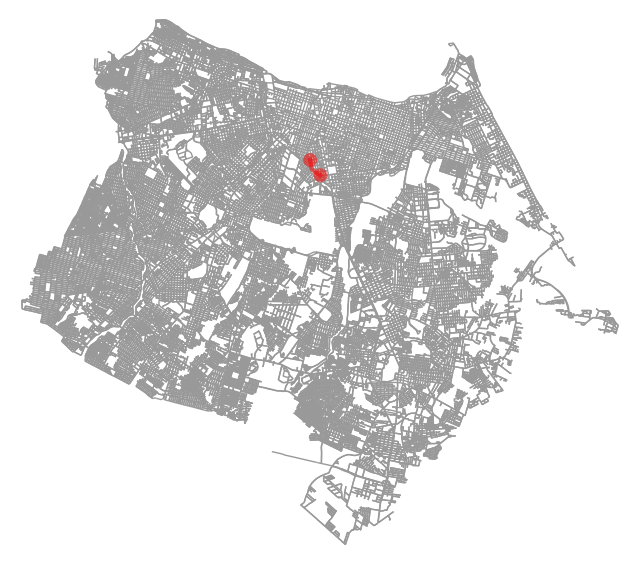

Tempo de execução: 14.94611 segundos
Calculando rota com heurística Haversine...


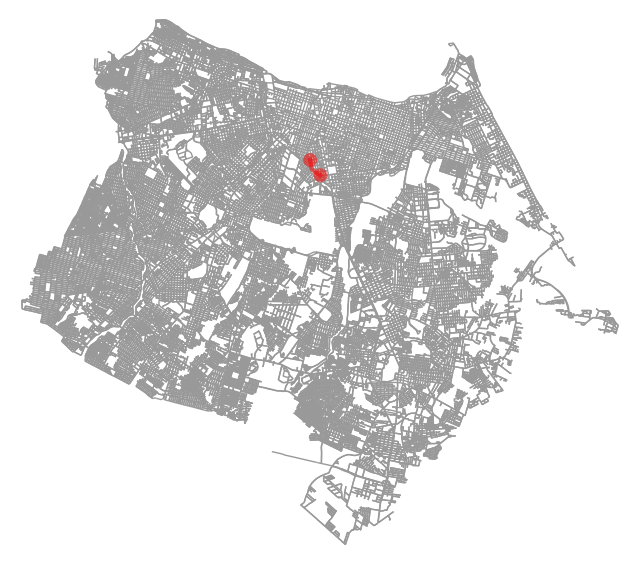

Tempo de execução: 11.47466 segundos


[253412122,
 8127682348,
 6589482513,
 6589482521,
 4937752807,
 2722597735,
 253412154,
 264770641,
 264770498,
 264770640,
 264770372]

In [ ]:
# Novo exemplo de uso
origem, destino = nodos[100], nodos[200]  # Usando diferentes nós como origem e destino
a_star_time_benchmark_complete(grafo, origem, destino)



Calculando rota com heurística euclidiana...


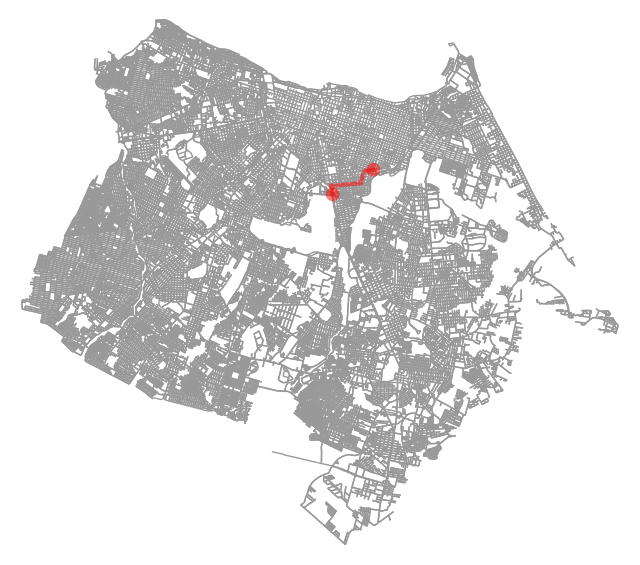

Tempo de execução: 12.93354 segundos
Calculando rota com heurística Haversine...


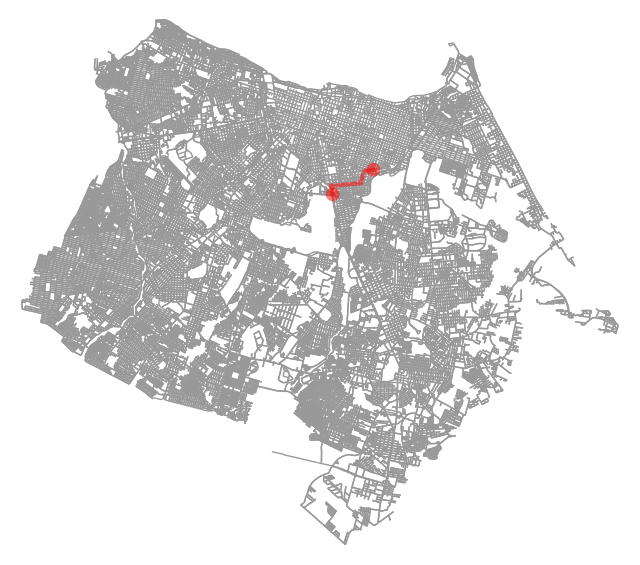

Tempo de execução: 12.03089 segundos


[253406515,
 253406546,
 252755089,
 3336979725,
 6589596889,
 2791532764,
 616541916,
 6589482677,
 616541918,
 622540834,
 616541919,
 2791295482,
 616541885,
 2791295480,
 616541920,
 2791334553,
 616541859,
 616541921,
 622539890,
 622539868,
 616541923,
 616541924,
 616541928,
 2791578368,
 616541927,
 2791578366,
 616541878,
 616541926,
 4351336304,
 621557180,
 2432078658,
 263930344]

In [ ]:
# Outro exemplo de uso
origem, destino = nodos[50], nodos[150]  # Usando diferentes nós como origem e destino
a_star_time_benchmark_complete(grafo, origem, destino)


Calculando rota com heurística euclidiana...


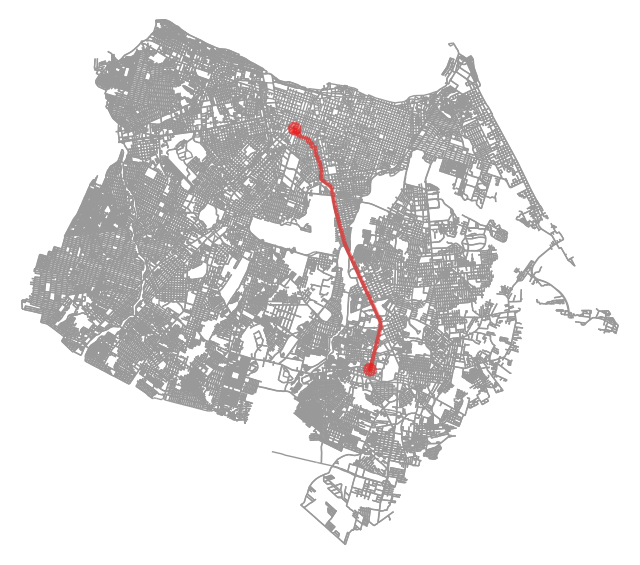

Tempo de execução: 11.50560 segundos
Calculando rota com heurística Haversine...


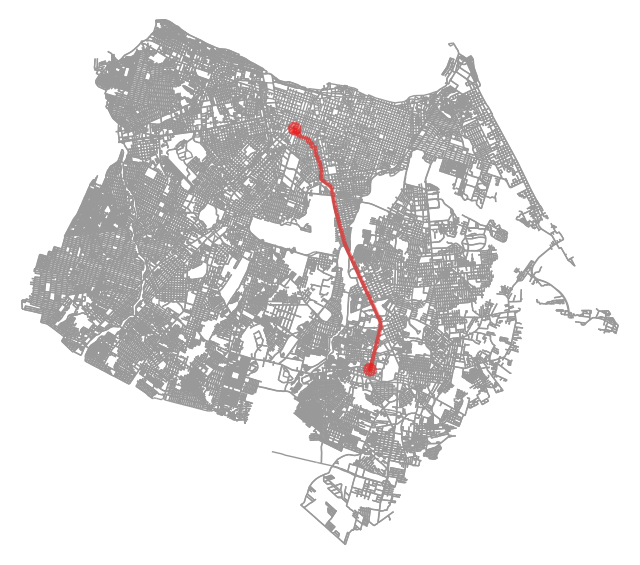

Tempo de execução: 11.75971 segundos


[252755043,
 2503390894,
 2503390890,
 2503390888,
 2503390883,
 2858650949,
 1704819056,
 1704818975,
 1704818879,
 1704818309,
 1704818213,
 2503429241,
 2245452235,
 2504523997,
 2504524003,
 2504538888,
 2281460110,
 2504538914,
 2504538918,
 6840495351,
 2242685126,
 2242685127,
 2518367026,
 2504538926,
 622541314,
 622541381,
 2504538942,
 622541186,
 253390958,
 253390959,
 7972553005,
 3816414754,
 622541201,
 5610330204,
 622541411,
 622541212,
 622541225,
 5610330202,
 622541663,
 622541655,
 622541635,
 2419579906,
 622541733,
 622541726,
 2506280544,
 622541714,
 2794695697,
 622541789,
 622541781,
 622541767,
 2504480932,
 2507317219,
 1974024623,
 2504480926,
 2504480928,
 253406515,
 253406546,
 252755089,
 4992794041,
 5057368097,
 2387681193,
 3225950364,
 3225950362,
 6662672373,
 7627094688,
 6600232713,
 253406576,
 253412110,
 253412147,
 2387681129,
 253412105,
 2387692446,
 2387692449,
 264770388,
 2387681182,
 264770408,
 264770418,
 264770435,
 253412109,
 264

In [ ]:
# Outro exemplo de uso
origem, destino = nodos[10], nodos[300]  # Usando diferentes nós como origem e destino
a_star_time_benchmark_complete(grafo, origem, destino)


Calculando rota com heurística euclidiana...


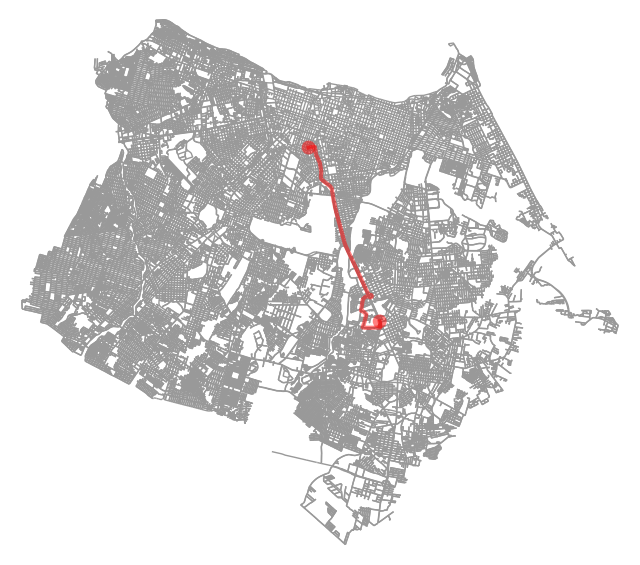

Tempo de execução: 11.47440 segundos
Calculando rota com heurística Haversine...


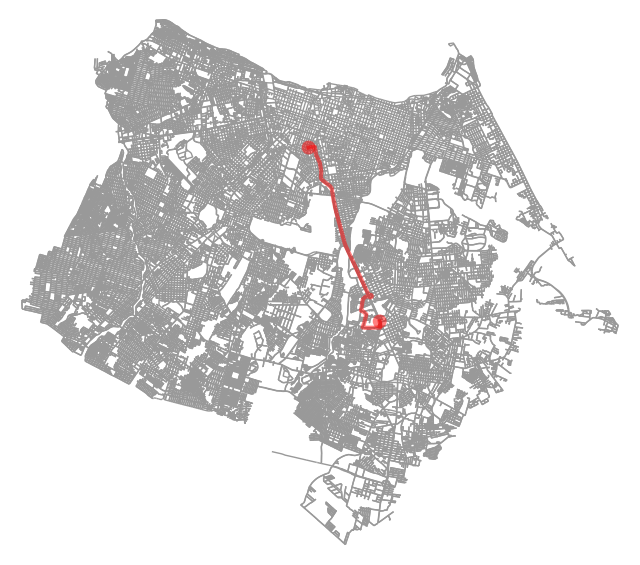

Tempo de execução: 10.81772 segundos


[253390851,
 975719166,
 253390853,
 6215537639,
 1704730567,
 1704730563,
 2281395155,
 10563146100,
 1704730416,
 1704730365,
 1704730287,
 2508944681,
 2508944695,
 4952722725,
 2508944685,
 264955144,
 264955145,
 1704729958,
 264955147,
 264955149,
 8486839432,
 2858121054,
 1704729662,
 264955161,
 264955163,
 264955173,
 264943754,
 264943757,
 2245404439,
 2504538884,
 622392608,
 2653795658,
 622392761,
 2504538902,
 1704729149,
 1704729032,
 1704728912,
 2504538918,
 6840495351,
 2242685126,
 2242685127,
 2518367026,
 2504538926,
 622541314,
 622541381,
 2504538942,
 622541186,
 253390958,
 253390959,
 7972553005,
 3816414754,
 622541201,
 5610330204,
 622541411,
 622541212,
 622541225,
 5610330202,
 622541663,
 622541655,
 622541635,
 2419579906,
 622541733,
 622541726,
 2506280544,
 622541714,
 2794695697,
 622541789,
 622541781,
 622541767,
 2504480932,
 2507317219,
 1974024623,
 2504480926,
 2504480928,
 253406515,
 253406546,
 252755089,
 4992794041,
 5057368097,
 238768

In [ ]:
# Outro exemplo de uso
origem, destino = nodos[20], nodos[250]  # Usando diferentes nós como origem e destino
a_star_time_benchmark_complete(grafo, origem, destino)


Calculando rota com heurística euclidiana...


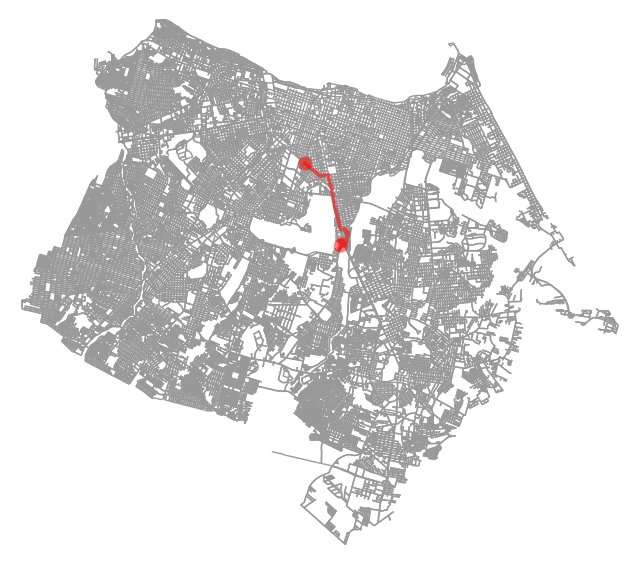

Tempo de execução: 11.42969 segundos
Calculando rota com heurística Haversine...


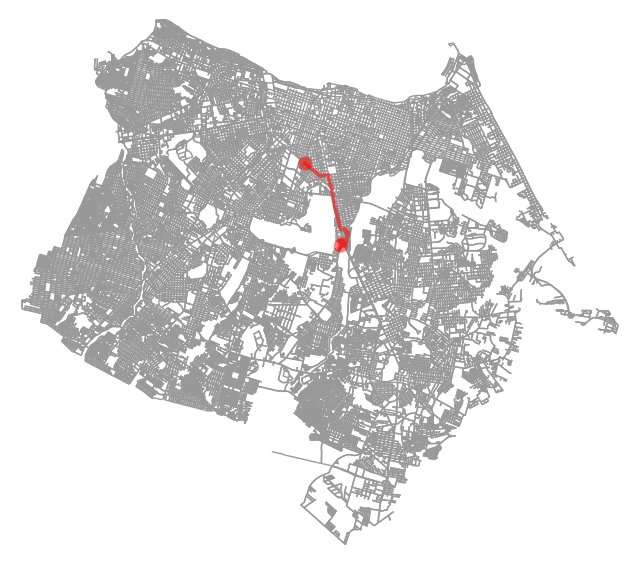

Tempo de execução: 13.05745 segundos


[253390901,
 253390791,
 622541138,
 2794920116,
 622541449,
 1897467740,
 253390945,
 253390965,
 253390815,
 253390875,
 253390942,
 622541459,
 622541464,
 622541406,
 622541219,
 622541217,
 622541229,
 622541575,
 2281465139,
 2794875025,
 622541663,
 622541655,
 622541635,
 2419579906,
 622541733,
 622541726,
 2506280544,
 622541714,
 2794695697,
 622541789,
 622541781,
 622541767,
 2504480932,
 2507317219,
 1974024623,
 2504480926,
 2504480928,
 253406515,
 253406546,
 252755089,
 3336979725,
 6589596889,
 8080141176,
 2722597743,
 2478971036,
 5876711424,
 3225950363,
 5876711422,
 3225950366,
 2506280546,
 4351336305,
 253406676,
 2279083378,
 253412130,
 6589482521,
 4937752807,
 2722597735,
 253412154,
 264770641,
 264770496,
 264770314,
 264770968]

In [ ]:
# Outro exemplo de uso
origem, destino = nodos[30], nodos[400]  # Usando diferentes nós como origem e destino
a_star_time_benchmark_complete(grafo, origem, destino)



prompt utilizado : 
```md
"Implemente um planejador de rotas baseado no algoritmo A utilizando dados do OpenStreetMap via OSMnx. O sistema deve modelar a malha viária de uma cidade como um grafo e encontrar o caminho mais curto entre dois pontos, minimizando a distância percorrida. Utilize heurísticas diferentes (Euclidiana e Haversine) para comparação de desempenho. O código deve ser bem estruturado, eficiente e gerar visualizações das rotas. e, colete métricas de tempo de execução e número de nós explorados para análise." 

```

vale resaltar que o codigo foi otimizado manualmente para deixar-lo mais claro, simplificado e eficiente.

### Conclusões do Trabalho

Neste trabalho, implementamos um planejador de rotas utilizando o algoritmo A* com dados do OpenStreetMap via OSMnx. A seguir, destacamos as principais conclusões obtidas:

1. **Modelagem da Malha Viária**:
    - Utilizamos a biblioteca OSMnx para obter a malha viária de Fortaleza, Brasil, e modelamos essa malha como um grafo onde os nós representam interseções e as arestas representam ruas.

2. **Algoritmo A***:
    - Implementamos o algoritmo A* para encontrar o caminho mais curto entre dois pontos no grafo, utilizando duas heurísticas diferentes: Euclidiana e Haversine.
    - O algoritmo foi eficiente em encontrar rotas, e a implementação incluiu a coleta de métricas de desempenho, como o tempo de execução e o número de nós explorados.

3. **Heurísticas**:
    - A heurística Euclidiana, que calcula a distância em linha reta entre dois pontos, mostrou-se eficiente em termos de tempo de execução.
    - A heurística Haversine, que calcula a distância geodésica entre dois pontos, também foi eficiente e, em alguns casos, apresentou resultados mais precisos devido à consideração da curvatura da Terra.

4. **Visualização das Rotas**:
    - Utilizamos a biblioteca Matplotlib para plotar as rotas encontradas no mapa, o que facilitou a visualização e análise dos resultados.

5. **Métricas Coletadas**:
    - Coletamos métricas de tempo de execução e número de nós explorados para cada heurística, permitindo uma comparação detalhada do desempenho de ambas.

6. **Desempenho**:
    - O algoritmo A* apresentou um bom desempenho na maioria dos casos, encontrando rotas eficientes em um tempo razoável.
    - A escolha da heurística pode impactar o desempenho, e a heurística Haversine tende a ser mais precisa em distâncias maiores.

Em resumo, o trabalho demonstrou a viabilidade e eficiência do uso do algoritmo A* para planejamento de rotas em malhas viárias urbanas, utilizando dados do OpenStreetMap. As visualizações das rotas e a coleta de métricas de desempenho forneceram insights valiosos para a análise e comparação das heurísticas utilizadas.